[[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
 [1 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1]
 [1 0 1 0 1 1 1 1 1 0 1 0 1 1 1 1 1 0 1 0 1]
 [1 0 1 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 1 0 1]
 [1 0 1 1 1 0 1 1 1 1 1 1 1 0 1 1 1 1 1 0 1]
 [1 0 1 0 0 0 1 0 0 0 0 0 1 0 0 0 1 0 1 0 1]
 [1 0 1 1 1 1 1 0 1 1 1 0 1 0 1 0 1 0 1 0 1]
 [1 0 0 0 0 0 0 0 1 0 1 0 1 0 1 0 1 0 1 0 1]
 [1 1 1 1 1 1 1 1 1 0 1 0 1 0 1 0 1 0 1 0 1]
 [1 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 1 0 0 0 1]
 [1 0 1 1 1 1 1 1 1 1 1 1 1 0 1 0 1 0 1 1 1]
 [1 0 1 0 0 0 0 0 1 0 0 0 0 0 1 0 1 0 0 0 1]
 [1 0 1 0 1 1 1 0 1 1 1 1 1 1 1 0 1 1 1 1 1]
 [1 0 0 0 1 0 1 0 0 0 0 0 1 0 0 0 1 0 0 0 1]
 [1 1 1 1 1 0 1 1 1 1 1 0 1 0 1 1 1 0 1 0 1]
 [1 0 0 0 1 0 0 0 1 0 0 0 1 0 0 0 0 0 1 0 1]
 [1 0 1 1 1 0 1 0 1 0 1 1 1 0 1 1 1 1 1 0 1]
 [1 0 1 0 0 0 1 0 1 0 0 0 1 0 1 0 0 0 0 0 1]
 [1 0 1 0 1 1 1 0 1 1 1 0 1 1 1 0 1 1 1 0 1]
 [1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 1]
 [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]]


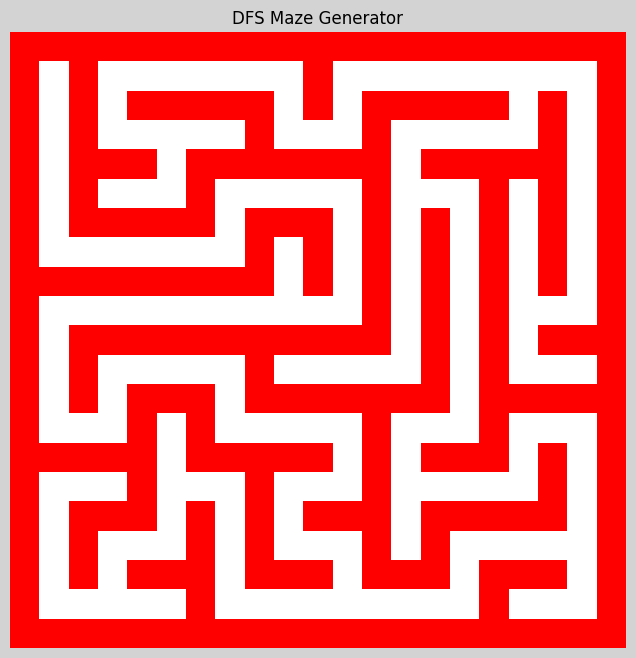

In [2]:
import random
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.colors as mcolors

    
# 定義迷宮尺寸（寬、高應為奇數）
WIDTH, HEIGHT = 21, 21

# 0 : 白
# 1 : 黑

def carve(maze, x, y):
    height, width = maze.shape

    directions = [(2,0), (-2,0), (0,2), (0,-2)]
    random.shuffle(directions)
    for dx, dy in directions:
        nx, ny = x + dx, y + dy
        if 0 < nx < width and 0 < ny < height and maze[ny][nx] == 1:
            maze[ny][nx] = 0
            maze[y + dy//2][x + dx//2] = 0
            carve(maze, nx, ny)
    
    return maze



def generate_maze(height=21, width=21):
    maze = np.ones((height, width), dtype=np.int8)
    # DFS生成隨機迷宮
    maze[1][1] = 0
    maze = carve(maze, 1, 1)
    return maze


maze = generate_maze(HEIGHT, WIDTH)

print(maze)

# 顯示迷宮
cmap = mcolors.ListedColormap(['white', 'black', 'green', 'red'])

plt.figure(figsize=(8, 8), facecolor = "lightgray")
plt.imshow(maze, cmap=cmap)
plt.axis('off')
plt.title("DFS Maze Generator")
plt.show()
